# Diabetes classification using KNN

In [160]:
import pandas as pd
import numpy as np

In [161]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [162]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [163]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Glucose, 
BloodPressure, 
SkinThickness, 
Insulin, 
BMI
<br>
columns have values 0 which does not ake sense , hence are missing values

In [164]:
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

To fill these Nan values the data distribution needs to be understood

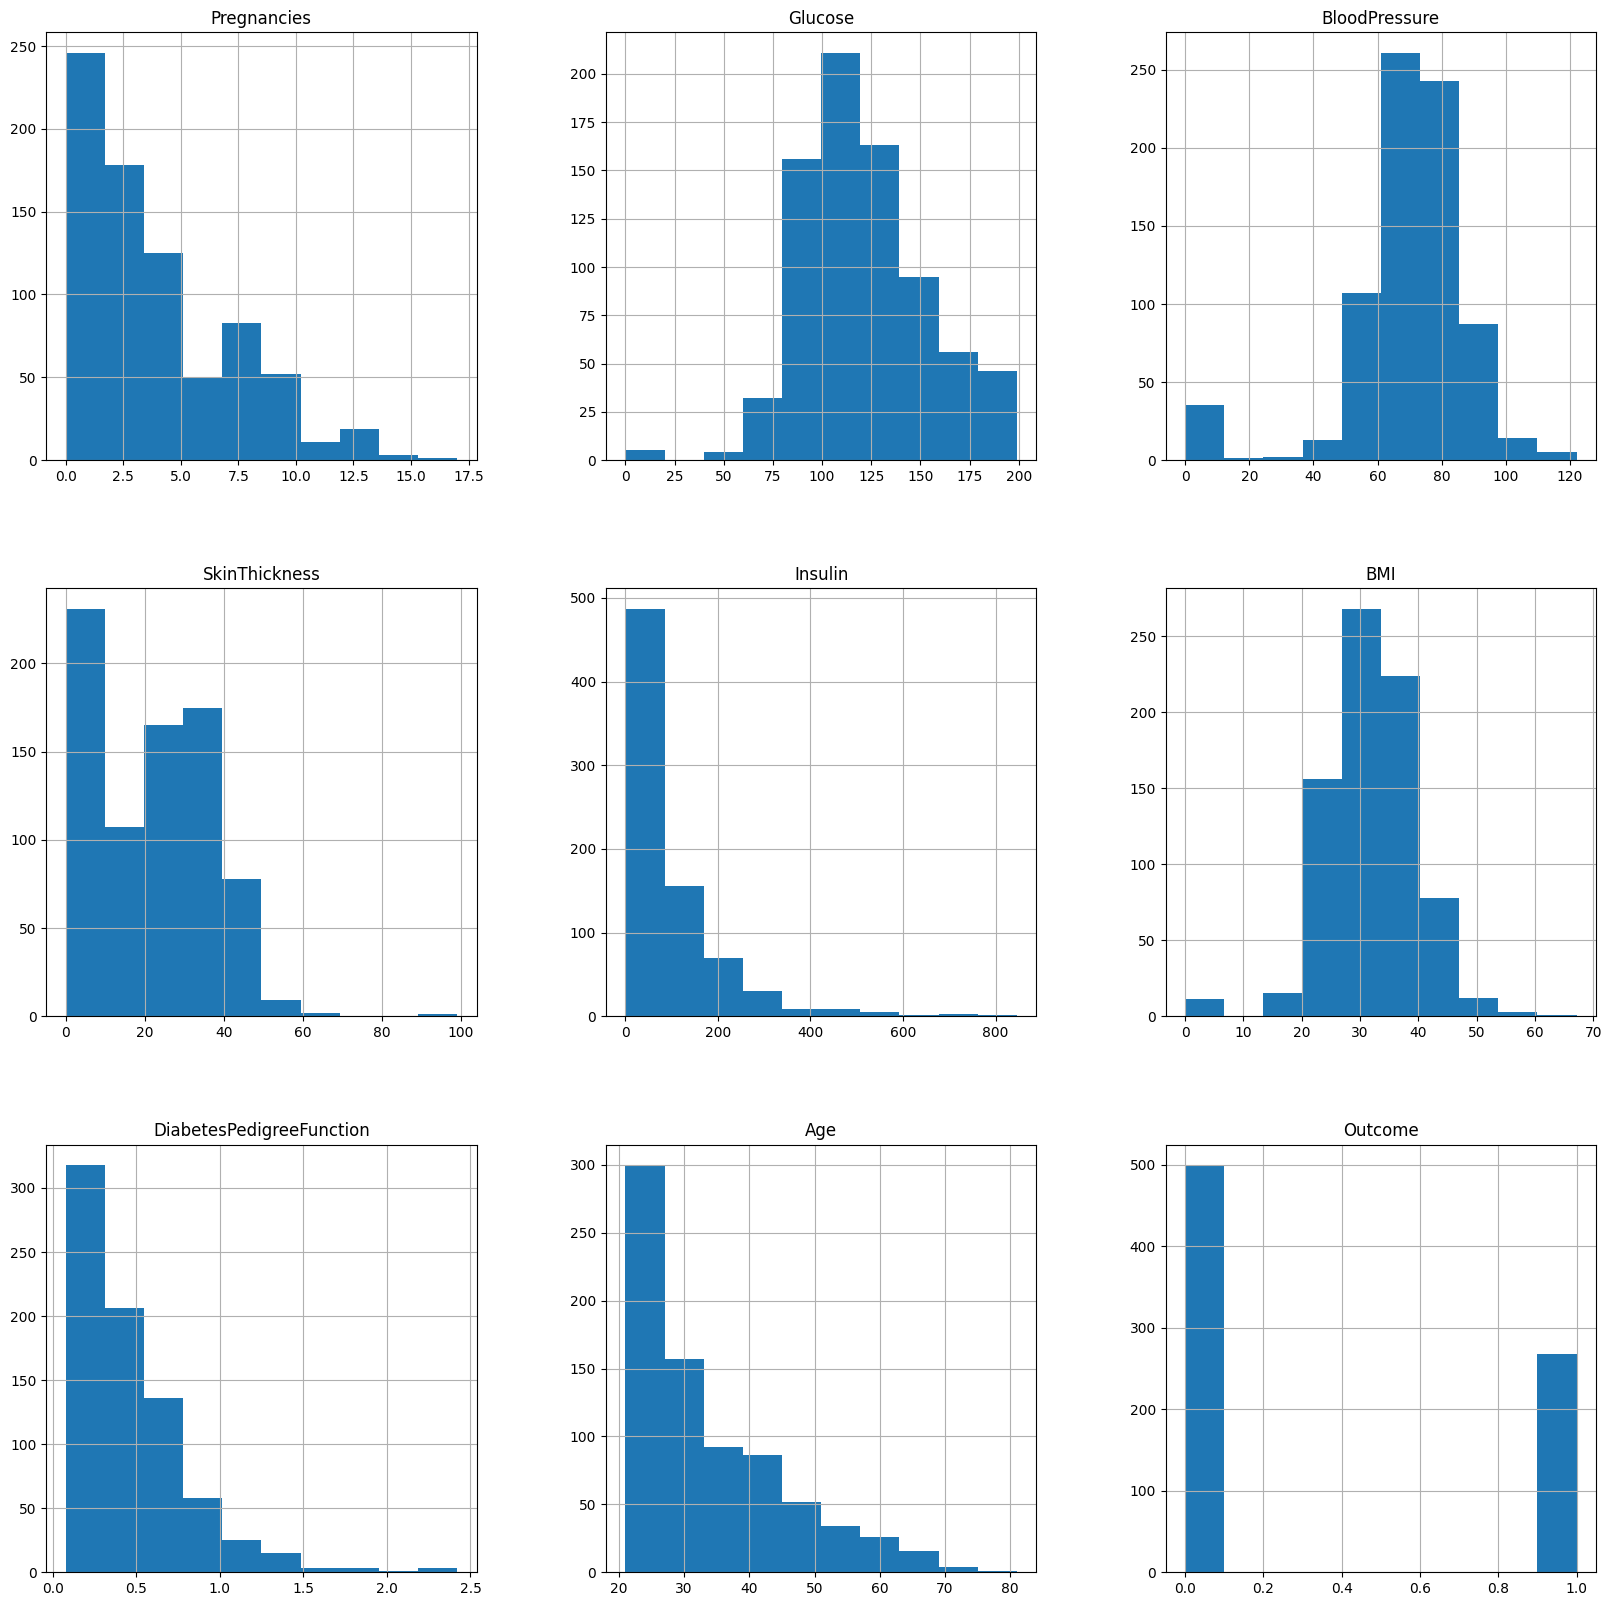

In [165]:
p = data.hist(figsize = (20,20))

In [166]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean())
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean())
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median())
data_copy['Insulin'].fillna(data_copy['Insulin'].median())
data_copy['BMI'].fillna(data_copy['BMI'].median())

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

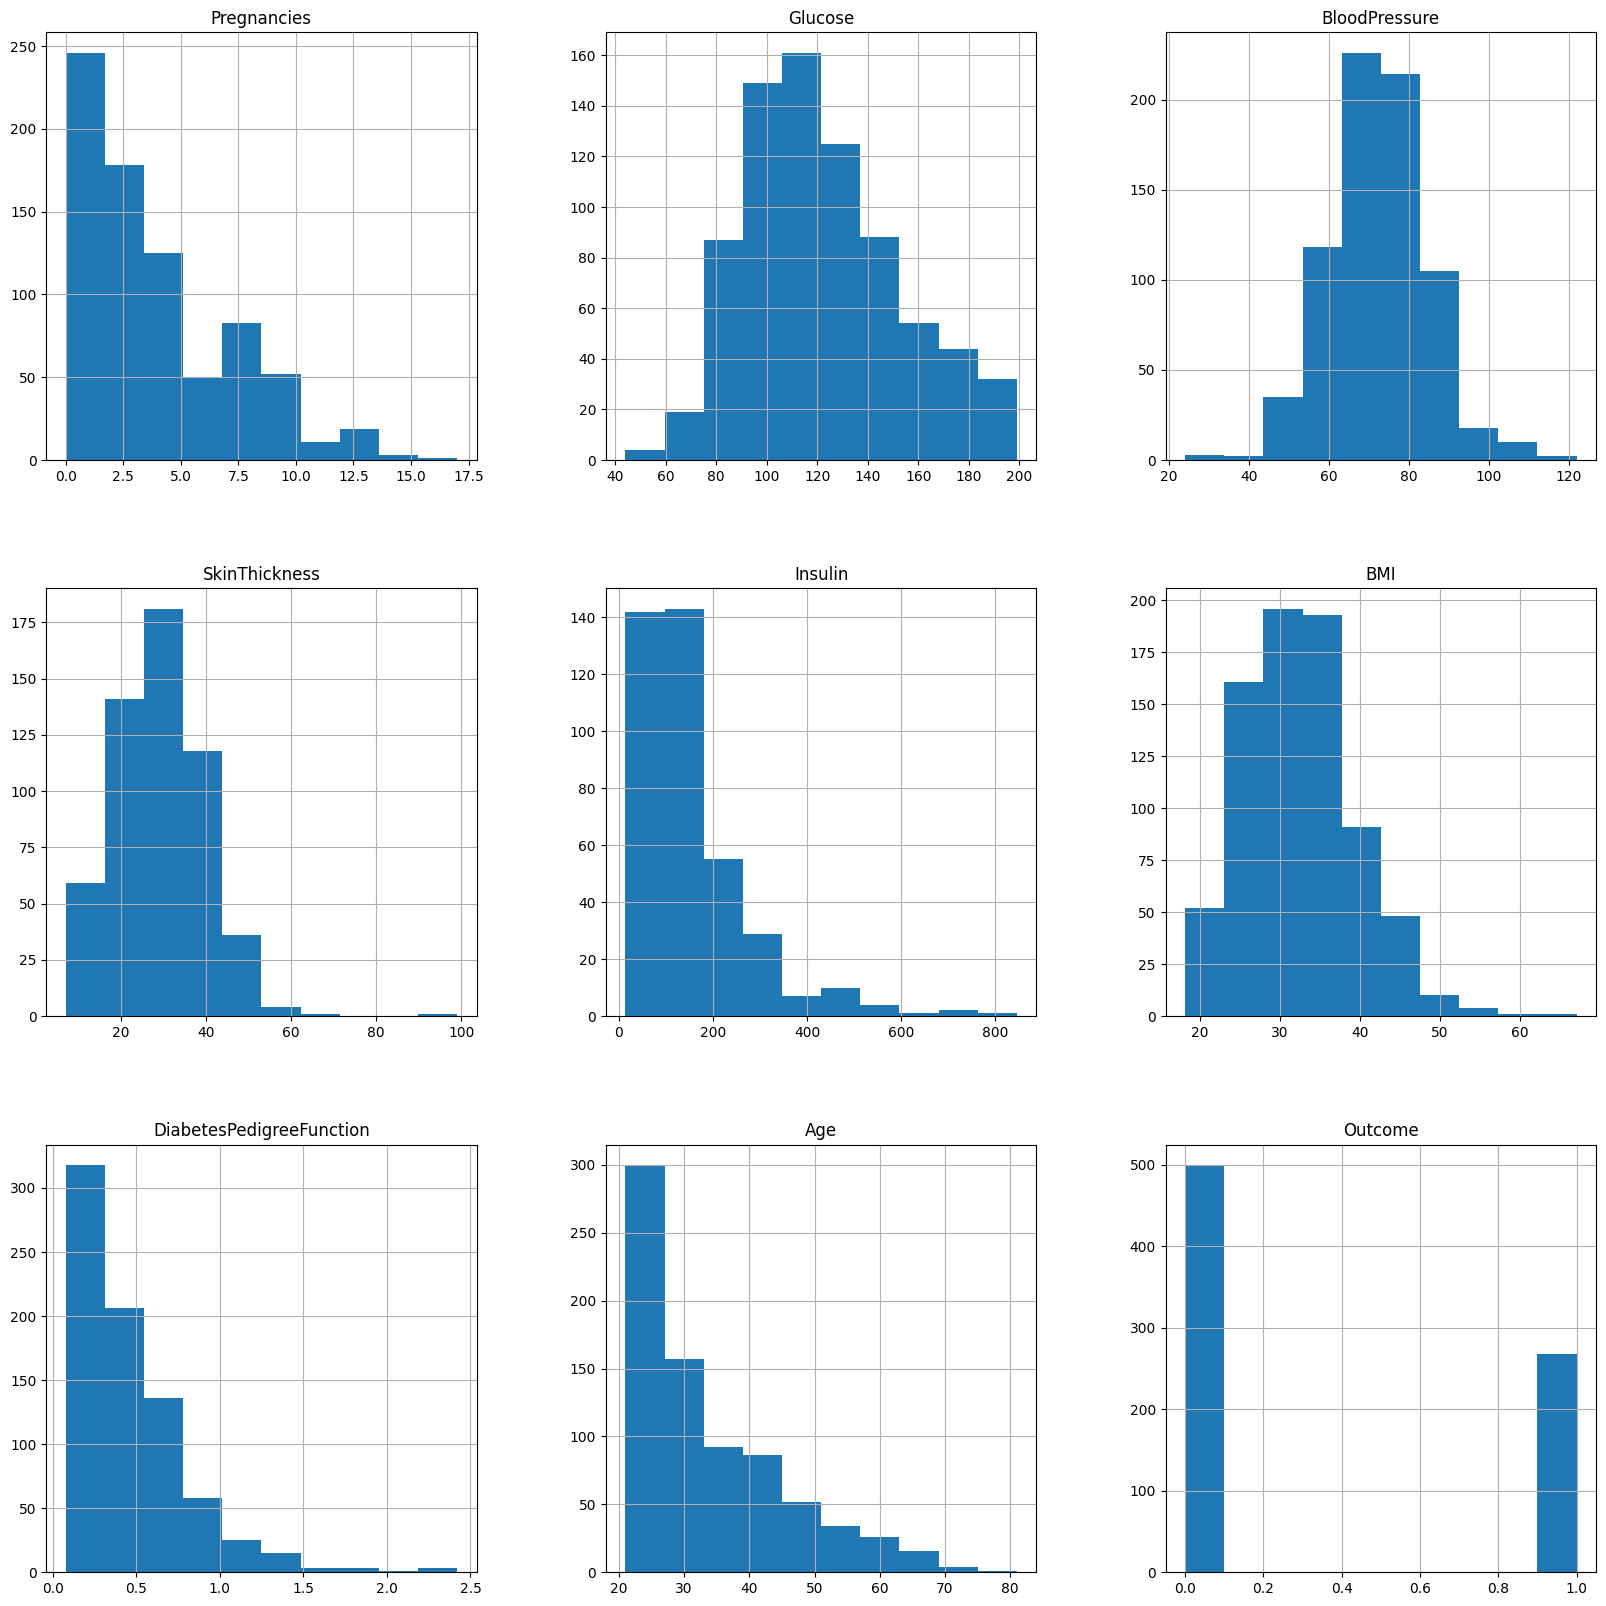

In [167]:
p = data_copy.hist(figsize = (20,20))

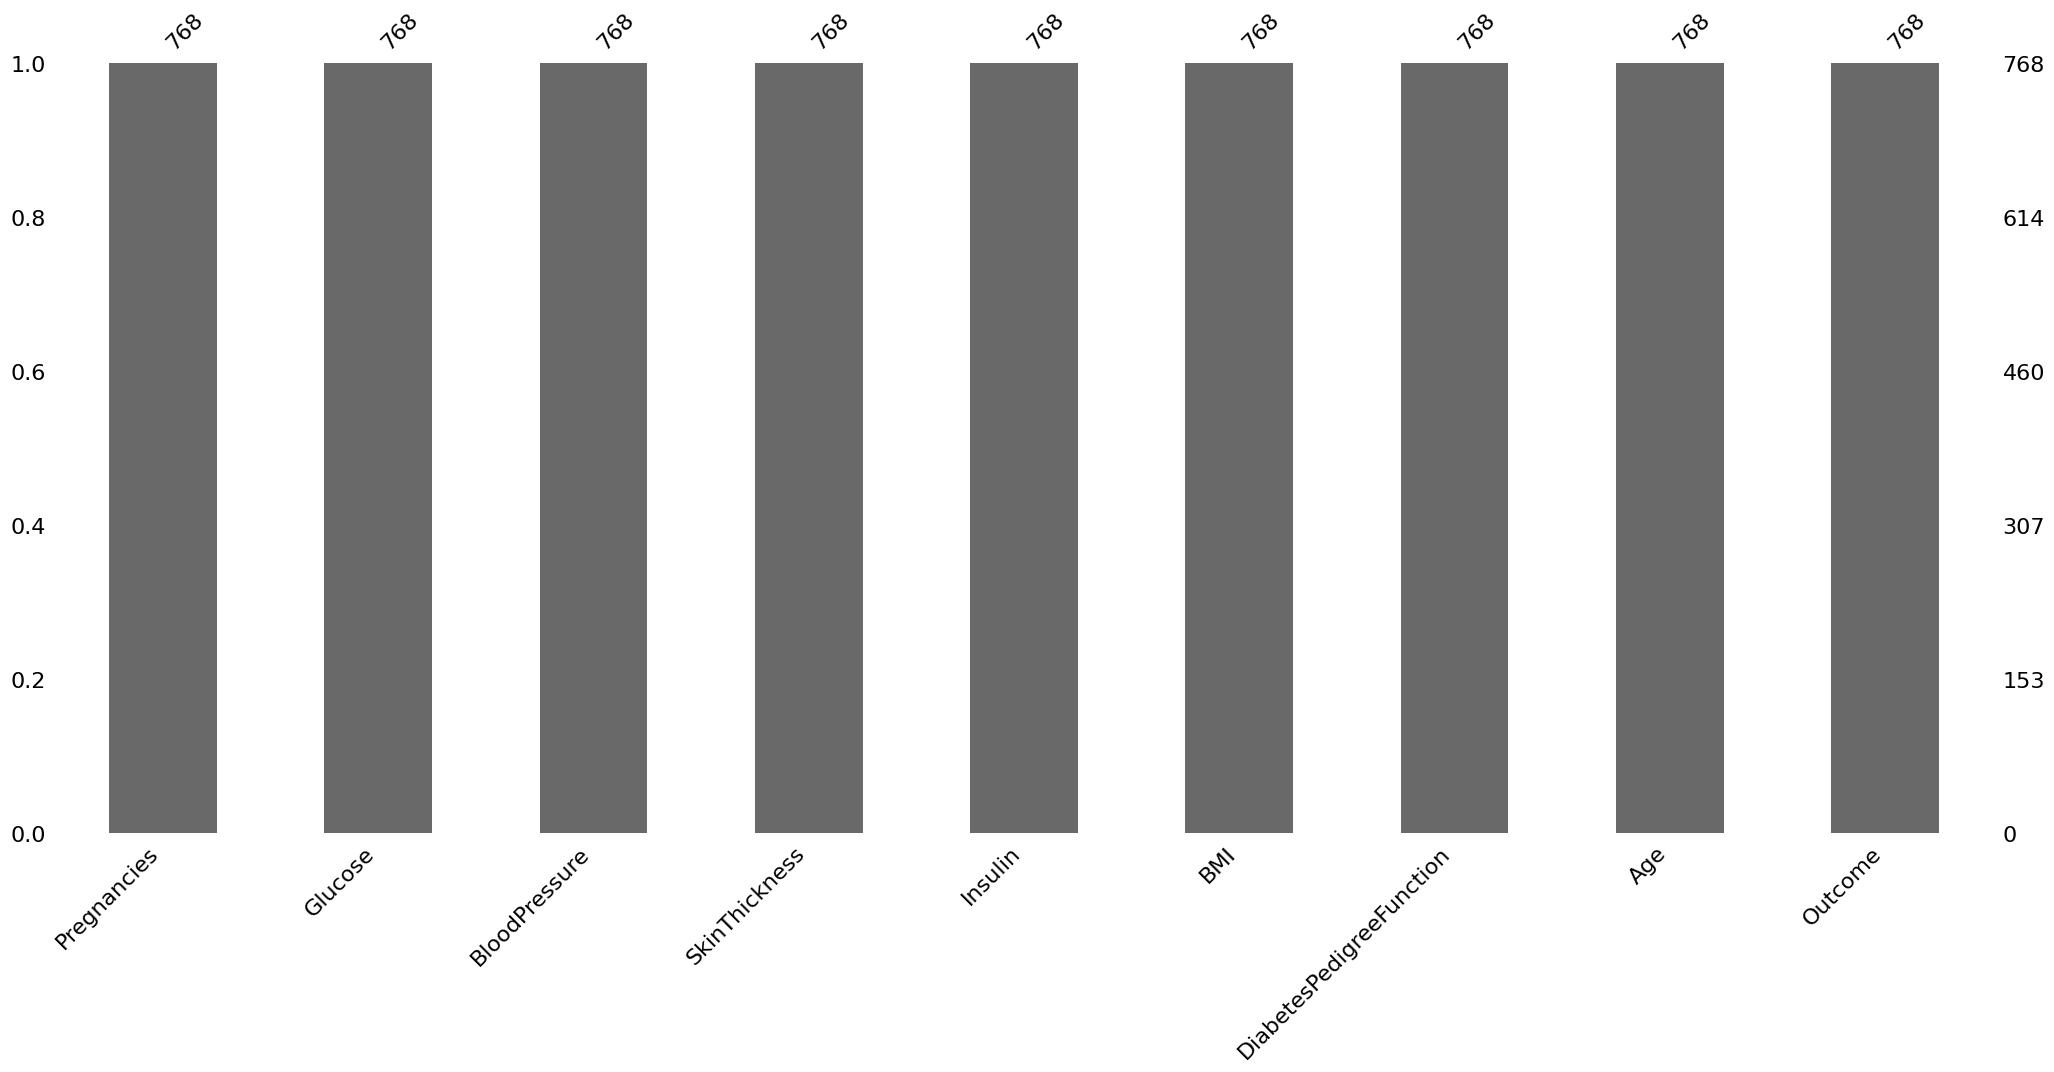

In [168]:
import missingno as msno
p = msno.bar(data)

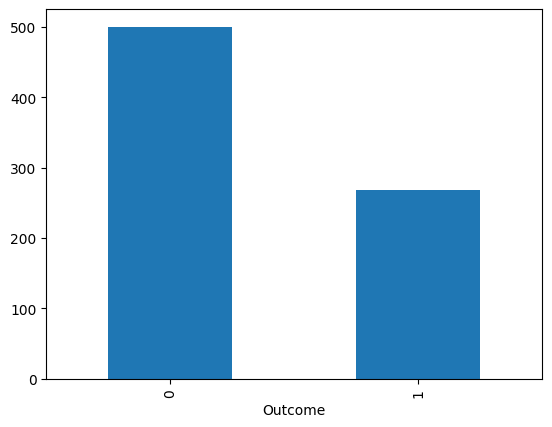

In [169]:
p=data.Outcome.value_counts().plot(kind="bar")

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

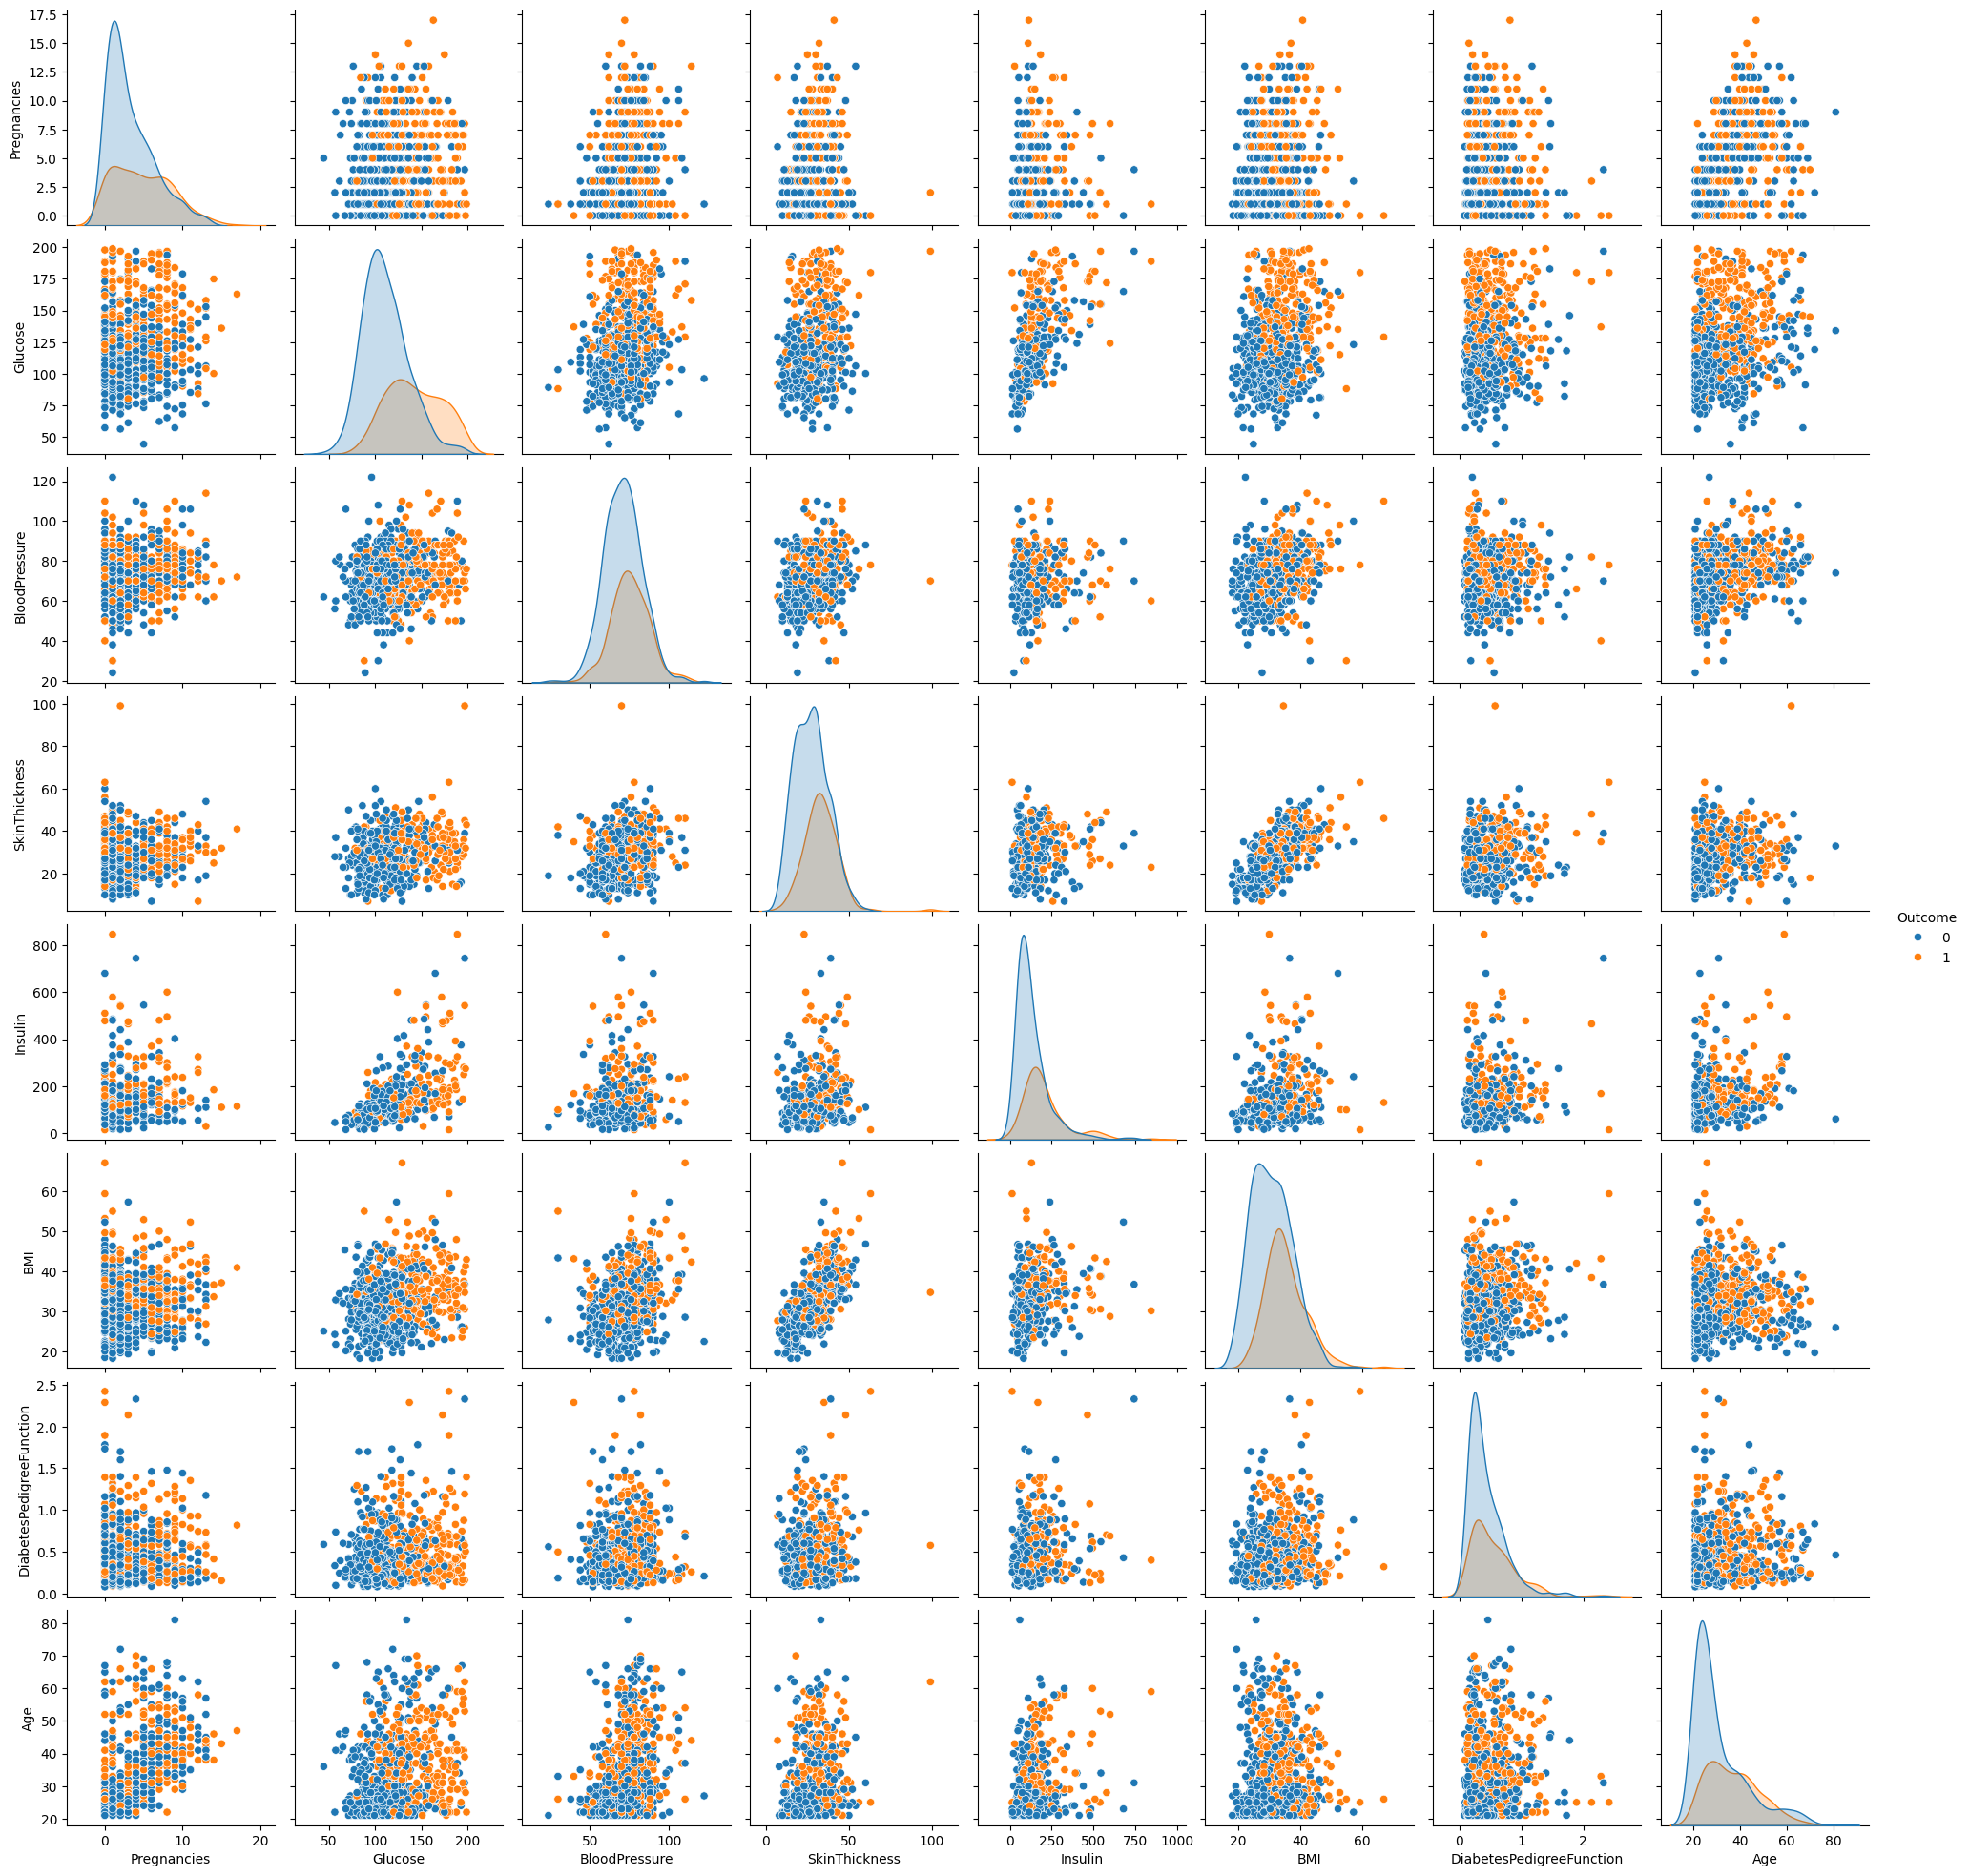

In [170]:
import seaborn as sns
p=sns.pairplot(data_copy, hue = 'Outcome')

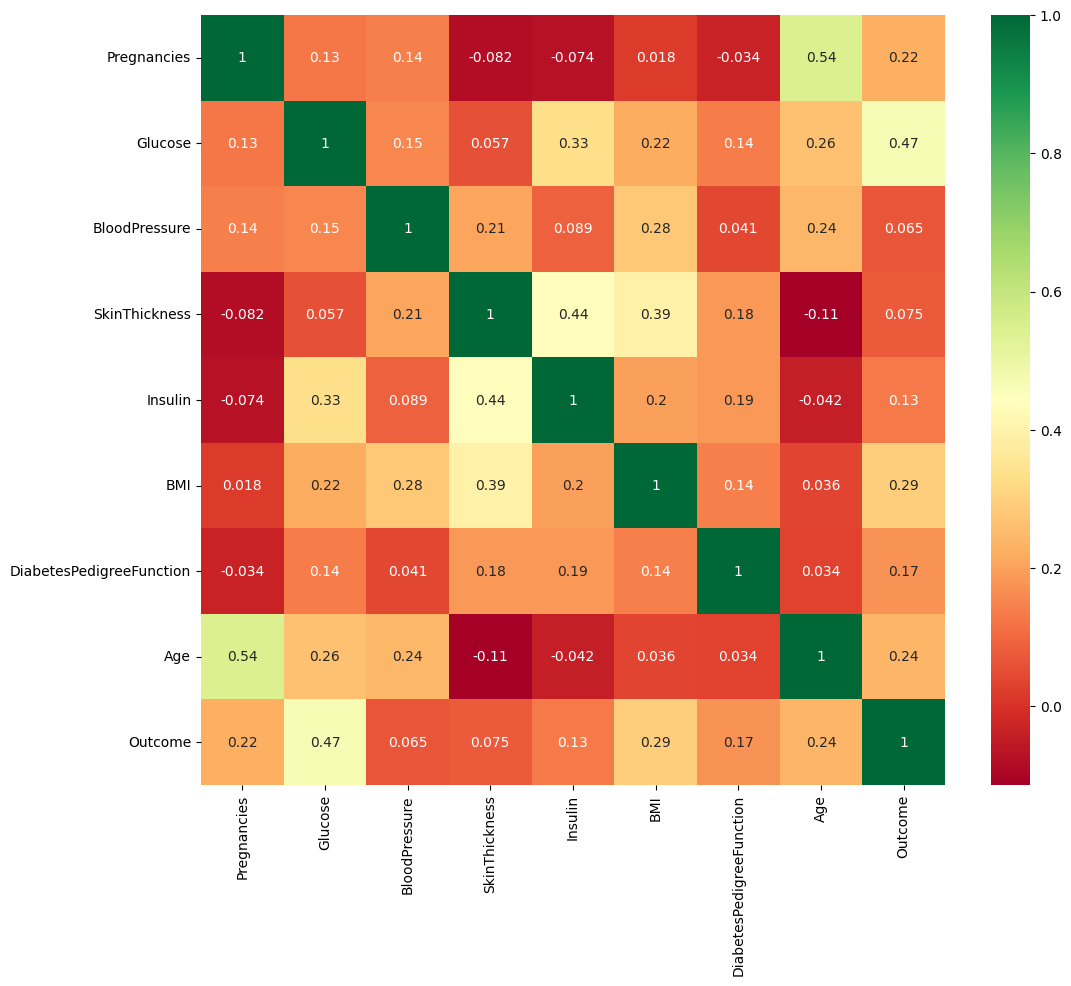

In [171]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

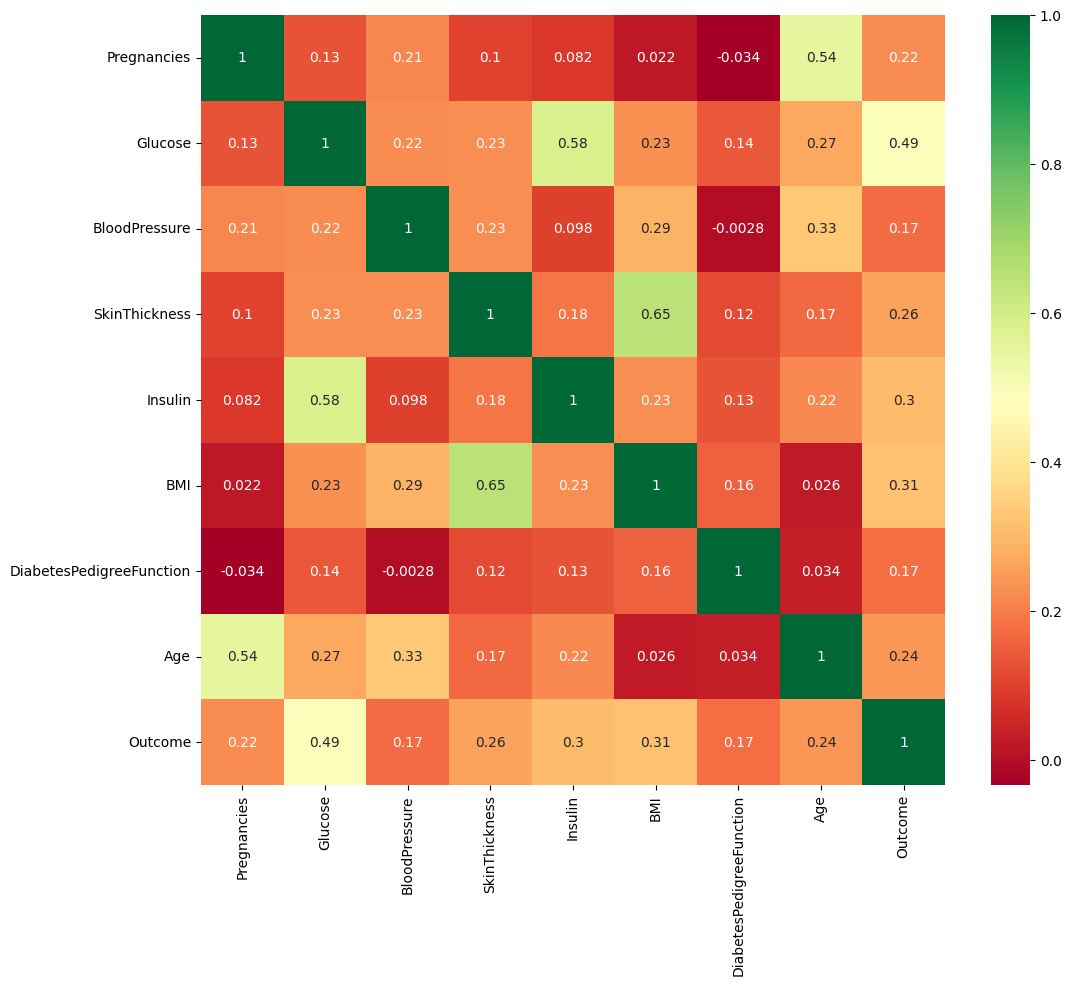

In [172]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [173]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"], axis =1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [174]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995
1,-0.844885,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672
2,1.233880,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496


In [175]:
y =data_copy.Outcome

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42, stratify=y)

In [177]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_imputed, y_train)
knn_train_score = knn.score(X_train_imputed, y_train)
knn_test_score = knn.score(X_test_imputed, y_test)
print(f"KNN Train Score: {knn_train_score}")
print(f"KNN Test Score: {knn_test_score}")
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train.index.isin(X_train_cleaned.index)]
knn_cleaned = KNeighborsClassifier(n_neighbors=3)
knn_cleaned.fit(X_train_cleaned, y_train_cleaned)
knn_cleaned_train_score = knn_cleaned.score(X_train_cleaned, y_train_cleaned)
print(f"KNN Cleaned Train Score: {knn_cleaned_train_score}")
model = HistGradientBoostingClassifier()
model.fit(X_train_imputed, y_train)  
hist_train_score = model.score(X_train_imputed, y_train)
hist_test_score = model.score(X_test_imputed, y_test)
print(f"HistGradientBoosting Train Score: {hist_train_score}")
print(f"HistGradientBoosting Test Score: {hist_test_score}")

KNN Train Score: 0.8566775244299675
KNN Test Score: 0.7142857142857143
KNN Cleaned Train Score: 0.8850931677018633
HistGradientBoosting Train Score: 1.0
HistGradientBoosting Test Score: 0.7532467532467533


In [178]:
print("X_train_imputed shape:", X_train_imputed.shape)
print("y_train shape:", y_train.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_imputed shape: (614, 8)
y_train shape: (614,)


In [179]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_imputed, y_train)

# Check the shapes
print("X_train_imputed shape:", X_train_imputed.shape)
print("y_train shape:", y_train.shape)

X_train_imputed shape: (800, 10)
y_train shape: (800,)


In [180]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or any strategy you prefer
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Use transform, not fit_transform

In [181]:

test_score_index = [i for i, v in enumerate(test_scores) if v== max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_index))))

Max test score 77.27272727272727 % and k = []


Length of train_scores: 14
Length of test_scores: 14
Length of Parameter range: 14


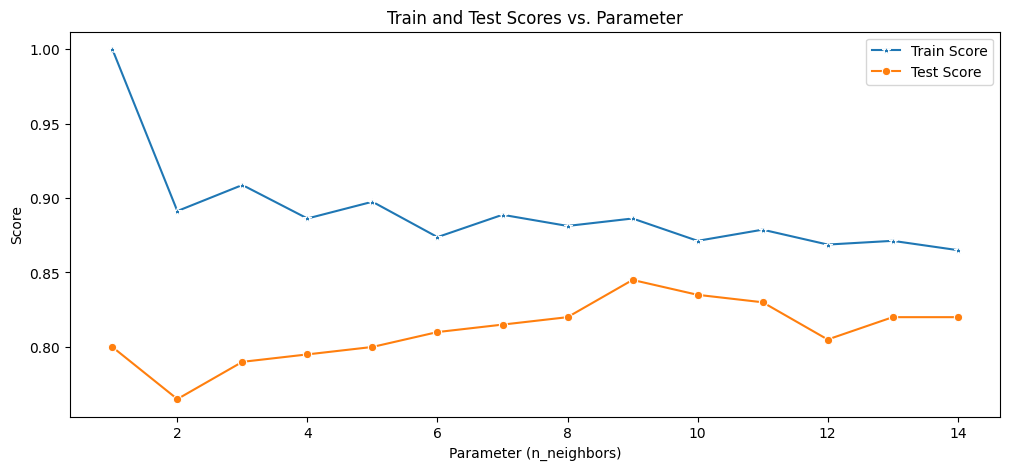

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_scores = []
test_scores = []


for parameter in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=parameter)
    knn.fit(X_train, y_train)
    
   
    current_train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    train_scores.append(current_train_score)
    test_scores.append(test_score)


print("Length of train_scores:", len(train_scores))
print("Length of test_scores:", len(test_scores))
print("Length of Parameter range:", len(range(1, 15)))


data = pd.DataFrame({
    'Parameter': range(1, 15),
    'Train Score': train_scores,
    'Test Score': test_scores
})


plt.figure(figsize=(12, 5))
sns.lineplot(data=data, x='Parameter', y='Train Score', marker='*', label='Train Score')
sns.lineplot(data=data, x='Parameter', y='Test Score', marker='o', label='Test Score')
plt.title('Train and Test Scores vs. Parameter')
plt.xlabel('Parameter (n_neighbors)')
plt.ylabel('Score')
plt.legend()
plt.show()

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_imputed, y_train)
test_score = knn.score(X_test_imputed, y_test)
print(f"Test Score: {test_score}")

Test Score: 0.83


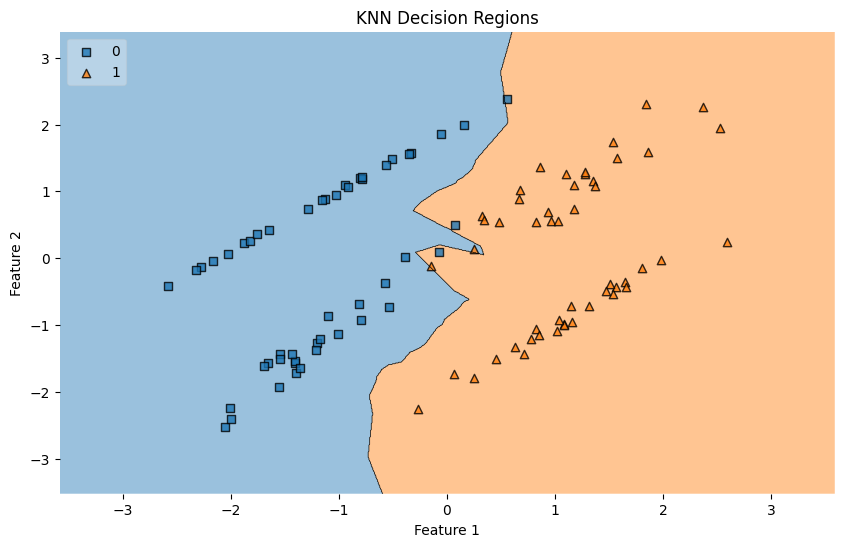

In [184]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, clf=knn, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Regions')
plt.show()

In [185]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

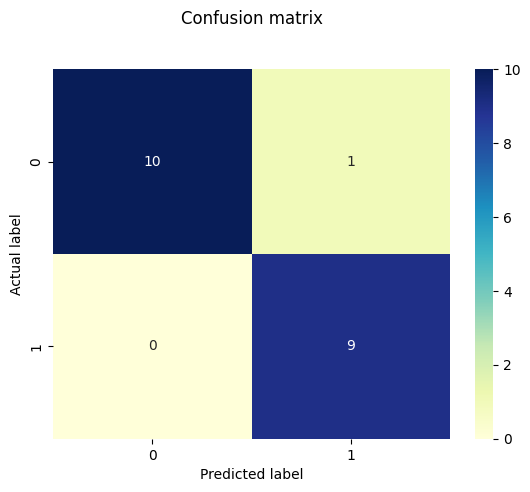

In [186]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [187]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results



model_evaluation(y_test, y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,KNN,0.95,0.9,1.0,0.947368,0.978261


In [188]:
# Alternate way
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



In [189]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

y_pred_proba = knn.predict_proba(X_test)[:,-1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

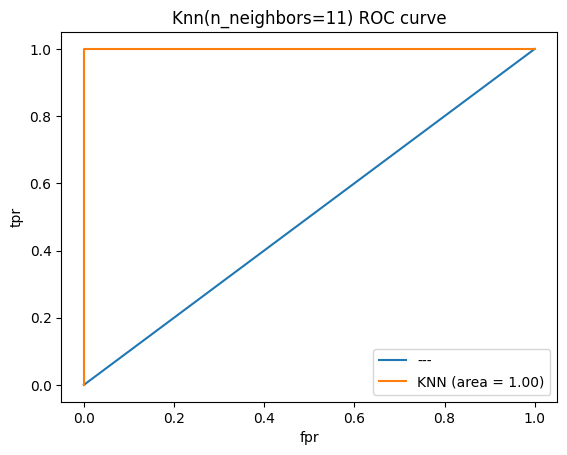

In [190]:
classifier_roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1], label = "---")
 
plt.plot(fpr, tpr, label ='KNN (area = %0.2f)' % classifier_roc_auc)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('Knn(n_neighbors=11) ROC curve')
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [191]:
#Hyper parameters tuning using GridSearchCV

In [192]:
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  
}
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
print("Best KNN parameters:", grid_search.best_params_)

Best KNN parameters: {'n_neighbors': 5}


In [193]:
print("Best Params" ,knn_GSV.best_params_)
print("Best score" ,knn_GSV.best_score_)

Best Params {'n_neighbors': np.int64(3)}
Best score 0.9800000000000001
